In [15]:
from micrograd.engine import Value
import micrograd.mlp_neural_network as nn
from drawgraph.neuralnet import draw_dot

In [16]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [17]:
mlp = nn.MLP(3, [4, 4, 1]) # (nin, nouts) where 'nin': no. of inputs at leaf, 'nouts': no. of neurons/output at each layer of total 'len(nouts)' layer
print(f"Number of parameters of this NN: {len(mlp.parameters())}")

Number of parameters of this NN: 41


In [18]:
ypred = [mlp(x) for x in xs] # currently predicted outputs
ypred

[Value(data = 0.4924631449127378),
 Value(data = -0.4148909136855291),
 Value(data = 0.4891732327910806),
 Value(data = 0.3319926811762615)]

In [19]:
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data = 3.2638169974231417)

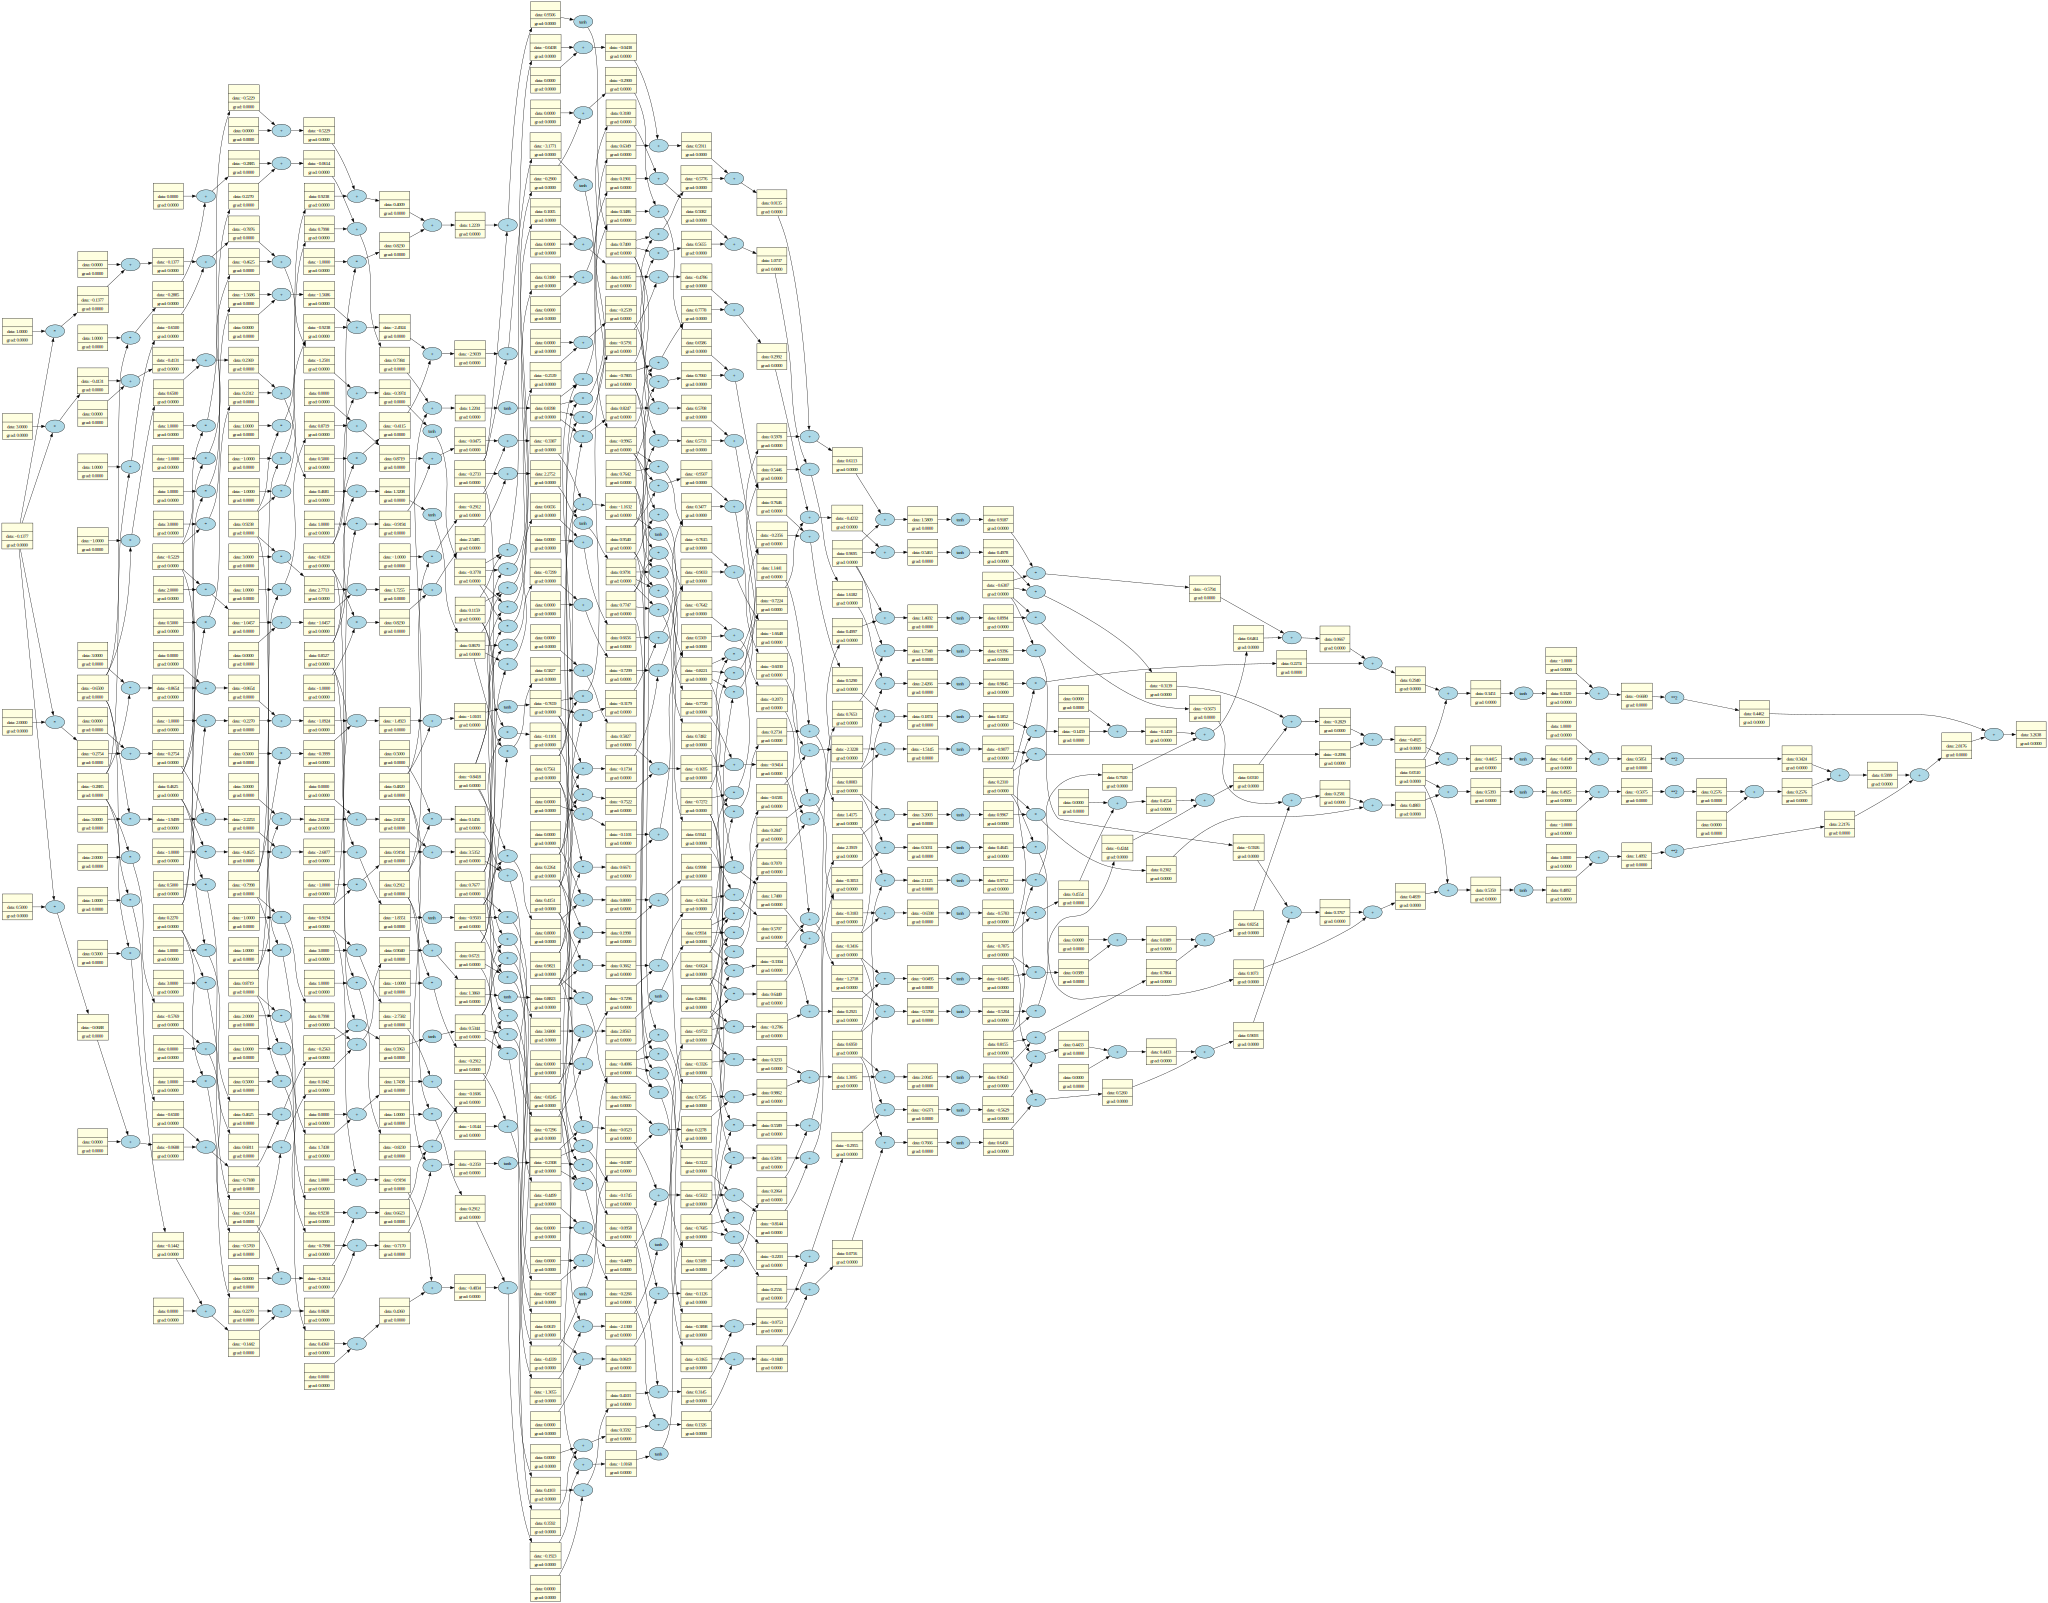

In [20]:
draw_dot(loss) #visualize the current forward pass upto the loss function

For loop (N iterations) to minimize the Loss Function using **Gradient Descent**

In [21]:
for k in range(50):
  
  # forward pass
  ypred = [mlp(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in mlp.parameters():
    p.grad = 0.0 # super important to flush the grads
  loss.backward()
  
  # update parameters with gradient descent
  for p in mlp.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)

0 3.2638169974231417
1 0.8478325297375368
2 0.2943790745105196
3 0.09665649456226007
4 0.07179699176426856
5 0.05764874326065246
6 0.04819437016256348
7 0.04136971776011521
8 0.03619911168401226
9 0.032144480960048384
10 0.02888048315880995
11 0.026197619398630606
12 0.02395451361391507
13 0.022052184105639396
14 0.020419223430406364
15 0.019002812612282843
16 0.01776304272916514
17 0.016669201113126628
18 0.015697270611005586
19 0.01482820281498331
20 0.0140466992542563
21 0.013340334287302063
22 0.012698912910798933
23 0.012113993233438366
24 0.011578526397184232
25 0.011086581594773416
26 0.010633133629794334
27 0.010213897046038744
28 0.009825195349083934
29 0.009463856963958257
30 0.009127131770460827
31 0.008812623626040475
32 0.008518235419180144
33 0.008242124024187397
34 0.007982663139770075
35 0.007738412449872032
36 0.00750809188861094
37 0.007290560051916993
38 0.007084795998117
39 0.006889883833743586
40 0.006704999600561062
41 0.006529400073474713
42 0.006362413152769041


In [22]:
print("predicted\ttarget\n")
for i in range(len(ys)):
    print(f"{ypred[i].data:.4f}\t\t{ys[i]}")

predicted	target

0.9699		1.0
-0.9916		-1.0
-0.9549		-1.0
0.9512		1.0


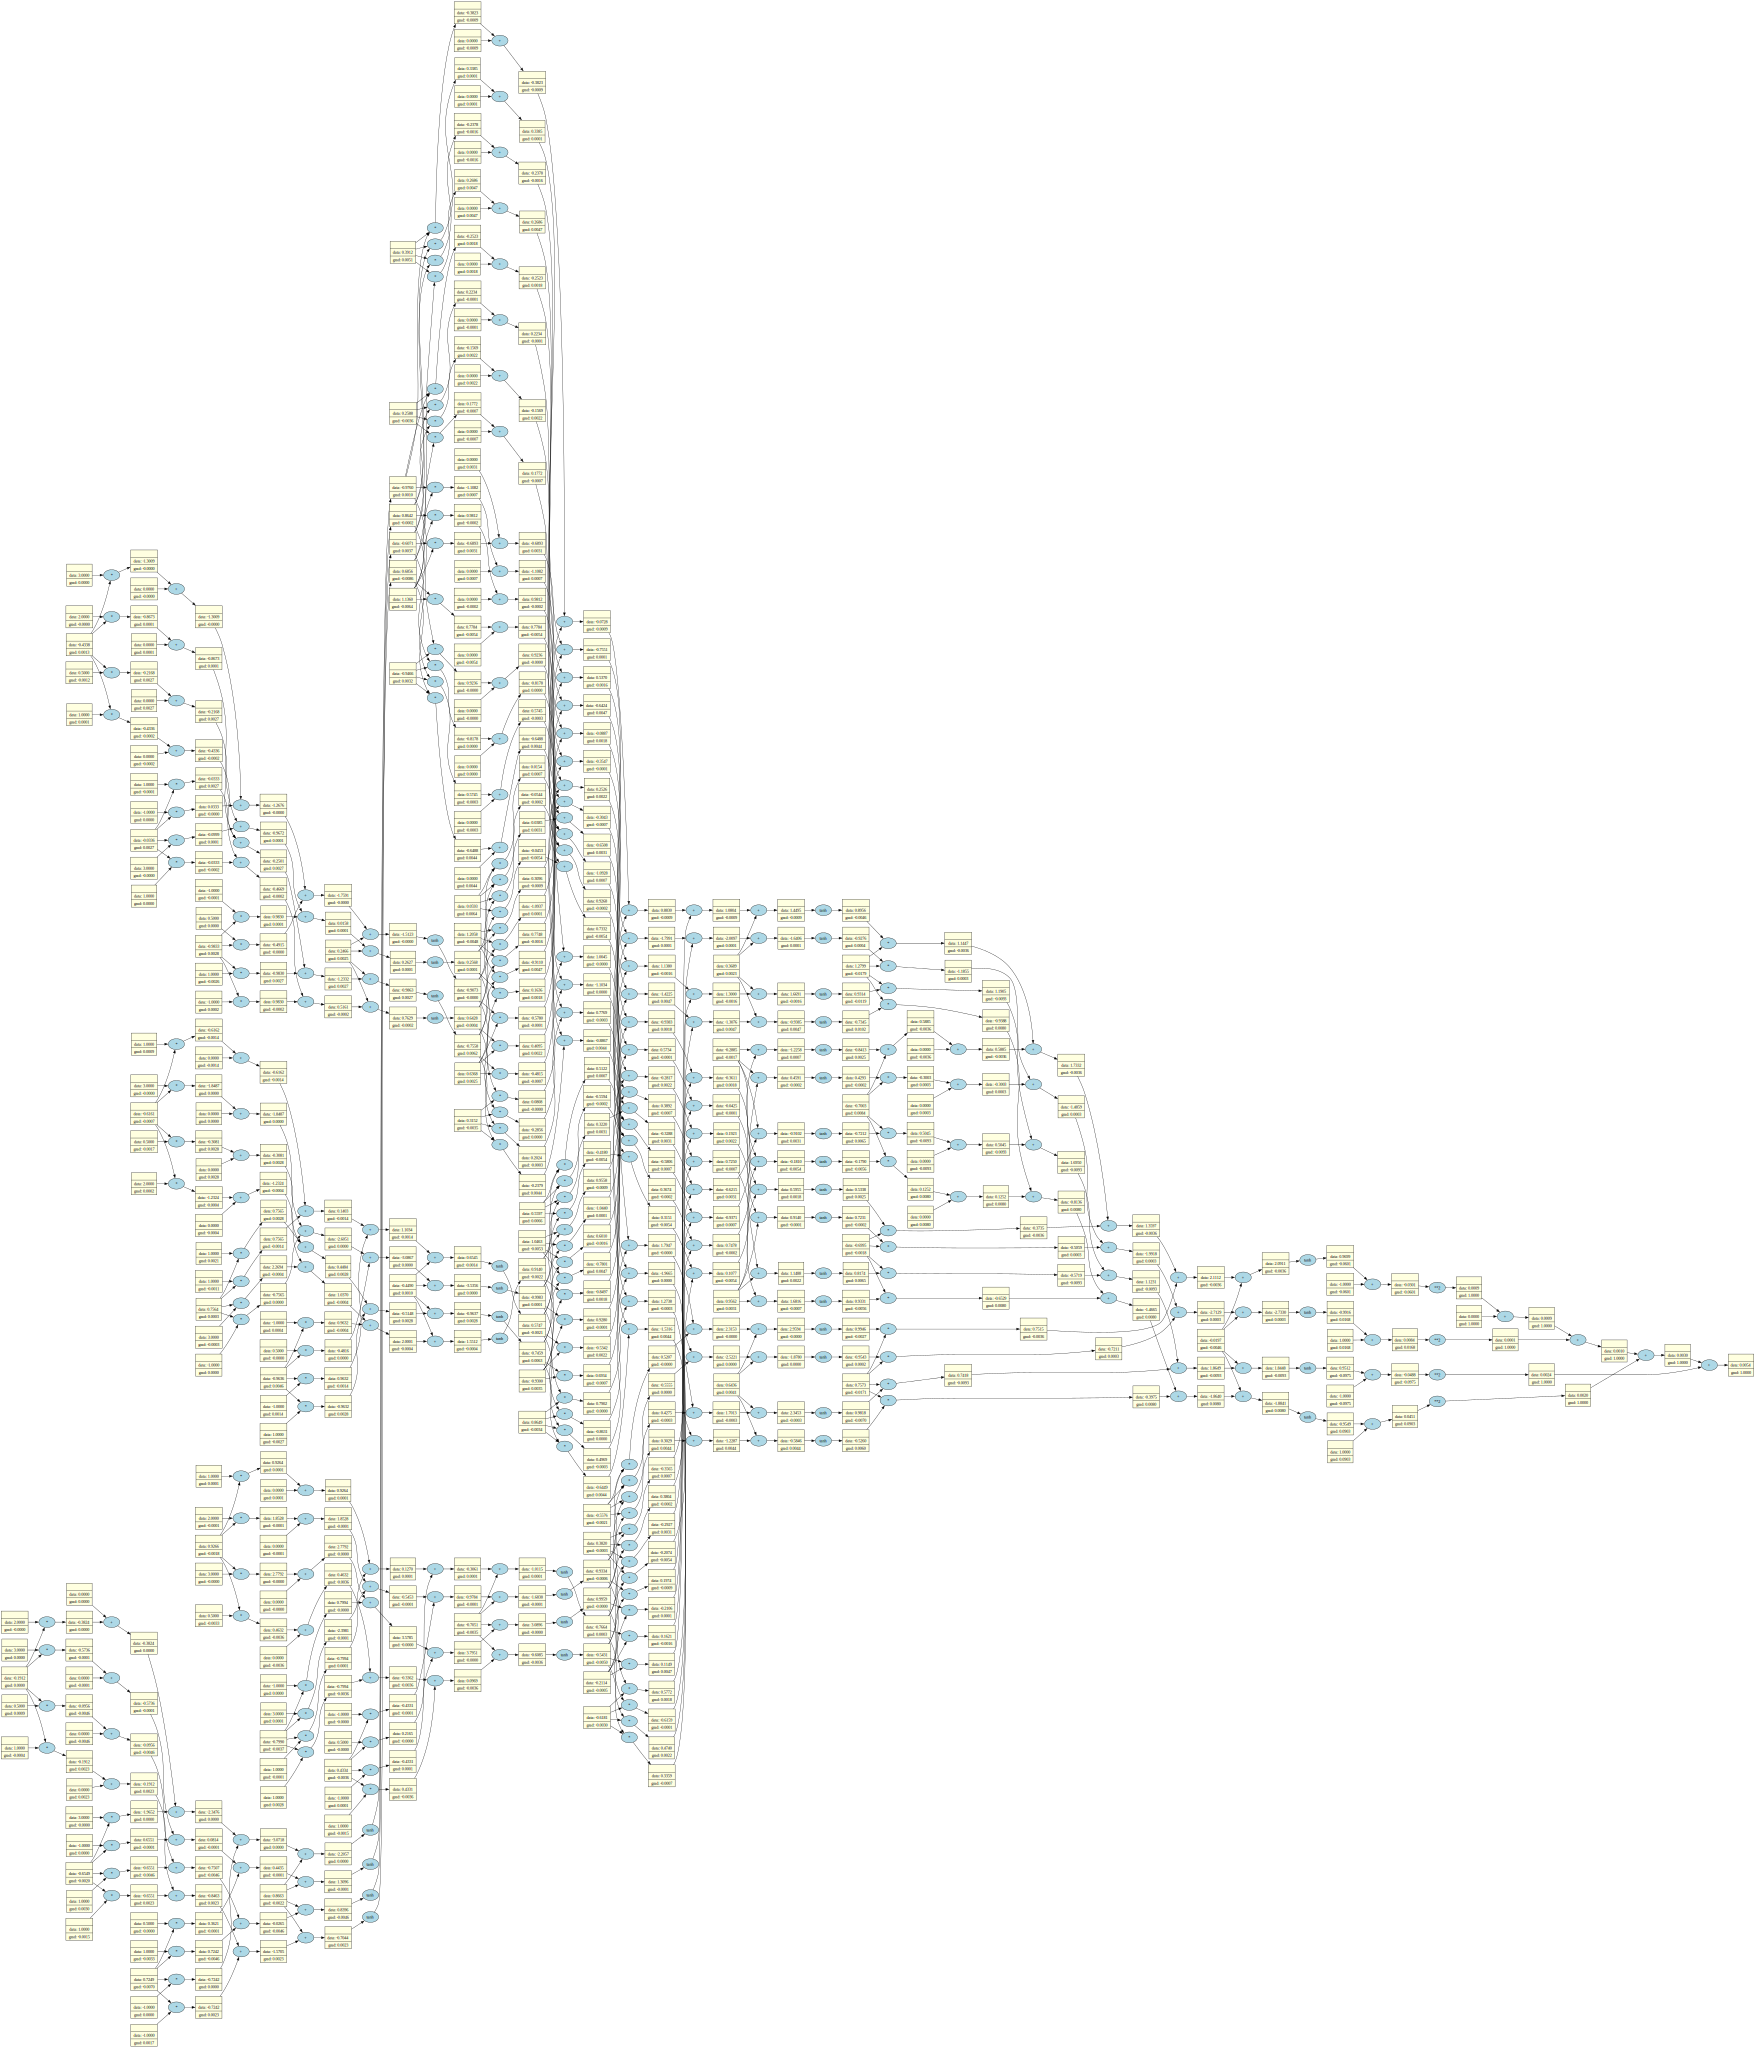

In [23]:
draw_dot(loss)